[[[[  1.82930764e-02   5.85271168e-02   6.51302608e-03   7.00434170e-02
     -2.47352591e-02]
   [  6.93014064e-02   6.02568385e-02   2.83678862e-02  -1.39409011e-02
     -3.63434842e-02]
   [  6.94342466e-02   5.56203962e-02   6.07723089e-02   3.32794464e-02
      7.59362166e-03]
   [  2.53754298e-02  -7.00715834e-03   2.41237529e-02  -1.93422244e-02
     -2.54865060e-02]
   [  4.60919474e-02  -1.97876210e-02   6.59697388e-02  -2.27182816e-02
     -4.04165190e-03]]]


 [[[  5.29342161e-02   5.10311071e-02   3.87099901e-02  -2.91922625e-02
      4.76659295e-02]
   [ -2.17398589e-02   3.57442814e-02   4.26292827e-02  -4.35983668e-02
      1.60911813e-02]
   [ -1.67186979e-02   9.24878805e-03   5.69141997e-02   7.16771896e-03
      1.96833383e-02]
   [  1.87177616e-03   5.88990998e-02  -8.93923943e-05   1.63848386e-02
     -4.83225667e-02]
   [ -3.93460389e-02   5.10858655e-02  -2.79897183e-02   1.23142187e-02
      1.72127273e-02]]]


 [[[ -2.79169827e-02   1.33686690e-02  -6.19058391e-

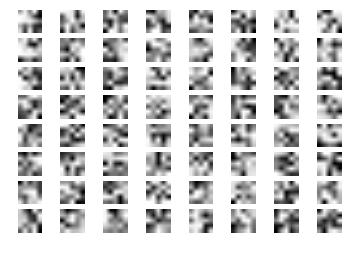

In [15]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

with np.load('model.npz') as f:
    param_values = [f['arr_%d' % i] for i in range(len(f.files))]
    print(param_values[0])

print(param_values[0].shape)

%matplotlib inline 
num_filtahz = len(param_values[0])
for i in range(num_filtahz):
    sp = plt.subplot(np.sqrt(num_filtahz), np.sqrt(num_filtahz), i+1)
    sp.axis('off')
    sp.imshow(np.reshape(param_values[0][i],(5,5)), cmap='Greys_r')
    plt.savefig('Filters.png')
#plt.imshow(np.reshape(param_values[0][0],(5,5)), interpolation = 'None')


In [47]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
a = np.random.random((50,50))
fig = plt.figure()
plt.imshow(a)
plt.colorbar()
fig.savefig('DEMO1.png')
plt.close(fig)

In [65]:
import numpy as np 
from scipy import ndimage

a = np.random.random((90,32*32))
a = a.reshape(-1, 1, 32, 32)
print(a.shape)
print(a[0].shape)
print(a[0][0].shape)
rad = 2

for i in range(0,90):
    ndimage.gaussian_filter(a[i][0], rad)

print(a.shape)

(90, 1, 32, 32)
(1, 32, 32)
(32, 32)


AttributeError: 'list' object has no attribute 'shape'

In [1]:
import numpy as np 
import h5py 
from scipy import ndimage

size = 128

with h5py.File('/global/homes/s/ssingh79/data/train_data_64k.h5','r') as hf: 
    # Read each 16k sample 
    train_set = hf['X_train'][0:1000,:]

print(train_set)

#Initialize batch images
smooth_images = np.zeros((1,size*size))    

# Lets smoooooooth
rad = 2
for i in range(0, 1000):
    image = np.reshape(train_set[i,:], (size, size))
    
    ## smooth with Gaussian filter of radius 2pix for both axes
    filtered = ndimage.gaussian_filter(image, rad)
    
    filtered = np.reshape(filtered, (1,size*size))
    
    smooth_images = np.vstack((smooth_images,filtered))
    
    print("Exiting iteration -------------", i)
    
smooth_images = np.delete(smooth_images,(0),axis=0)

print(smooth_images)
print(smooth_images.shape)

with h5py.File('/global/homes/s/ssingh79/data/gaussian_smooth.h5', 'w') as hf:
    # write the 1000 samples to a h5py file.
    hf.create_dataset('X_train', data = smooth_images[:,:]) 
    
print('Smooth file written! ') 

[[-0.01032324  0.00679525  0.0022744  ..., -0.00186596 -0.00139782
  -0.00295408]
 [ 0.03064897  0.00953815  0.03919139 ..., -0.04416131 -0.01501628
  -0.03169146]
 [-0.00054488  0.03779386  0.03071115 ...,  0.03494589 -0.00192948
  -0.01491482]
 ..., 
 [-0.02824685 -0.03116289 -0.04136577 ..., -0.01089858  0.05280219
   0.0309692 ]
 [-0.00946092 -0.00662175 -0.00316539 ..., -0.05447764 -0.05725526
  -0.03692801]
 [-0.0244558  -0.0279687  -0.01888587 ..., -0.01213018 -0.03259552
  -0.03535522]]
Exiting iteration ------------- 0
Exiting iteration ------------- 1
Exiting iteration ------------- 2
Exiting iteration ------------- 3
Exiting iteration ------------- 4
Exiting iteration ------------- 5
Exiting iteration ------------- 6
Exiting iteration ------------- 7
Exiting iteration ------------- 8
Exiting iteration ------------- 9
Exiting iteration ------------- 10
Exiting iteration ------------- 11
Exiting iteration ------------- 12
Exiting iteration ------------- 13
Exiting iteration --

In [71]:
print(smooth_images)

[[ -1.20442095e-02  -1.27695488e-02  -1.41387350e-02 ...,   4.27836638e-03
    2.74013776e-03   2.04827482e-03]
 [  1.30080003e-02   1.22120476e-02   1.16145918e-02 ...,  -3.57213637e-02
   -3.48192984e-02  -3.46719500e-02]
 [  1.95865273e-02   2.92134374e-02   4.60265068e-02 ...,   2.79868296e-02
    1.59395959e-02   9.33223152e-03]
 ..., 
 [ -3.33873790e-02  -3.12619703e-02  -2.66870552e-02 ...,  -1.15916020e-02
   -4.45193564e-03   8.81887946e-05]
 [ -9.47133818e-03  -9.11241582e-03  -8.61331135e-03 ...,  -4.28119844e-02
   -4.50949719e-02  -4.60763773e-02]
 [ -4.53000376e-03  -4.32406138e-03  -5.28573355e-03 ...,  -2.19061220e-02
   -2.22056029e-02  -2.23539501e-02]]


In [72]:
print(smooth_images.shape)

(1000, 16384)


In [3]:
import os

DATA  = os.getenv('DATA')
print(DATA)

None


In [62]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

X = np.random.random((50, 25*25))
print("X : ", X)
print(X.shape)

#%matplotlib inline
#seg = np.reshape(X,(25, 25))
#plt.imshow(seg[0], interpolation = 'None')
#print("Reshaped :", seg)
#print(seg[0].shape)

patch = 20

new_seg = np.zeros((1,20*20))
print(new_seg.shape)

for i in range(0,50):
    seg = X[i,:]
    seg = np.reshape(seg,(25,25))
    temp = seg[0:20,0:20]
    temp = np.reshape(temp, (1,20*20))
    new_seg = np.vstack((new_seg, temp))

new_seg = np.delete(new_seg,(0),axis=0)    
print("New segment : ", new_seg)
print(new_seg.shape)

# Reshape to (20, 20, 50)
data = np.reshape(new_seg, (20*20, 50))
data = np.reshape(new_seg, (20, 20, -1))
print("Final training shape : ", data.shape)




X = X.reshape(25,25,-1)
print(X.shape)
print(X.shape[2])
idx = np.random.randint(0,X.shape[2],90)
print(idx.shape)





X :  [[ 0.49462459  0.14165733  0.02499166 ...,  0.15280451  0.24280119
   0.47138116]
 [ 0.20350632  0.70900398  0.4463591  ...,  0.60794504  0.43512146
   0.38420416]
 [ 0.17326989  0.48018051  0.66742127 ...,  0.99071918  0.56875375
   0.15031609]
 ..., 
 [ 0.60851948  0.64117561  0.86673834 ...,  0.42573928  0.53330349
   0.00401528]
 [ 0.54408914  0.29949996  0.98865652 ...,  0.05250478  0.22005742
   0.62027796]
 [ 0.13079335  0.89348351  0.04369549 ...,  0.5592882   0.25203893
   0.4868049 ]]
(50, 625)
(1, 400)
New segment :  [[ 0.49462459  0.14165733  0.02499166 ...,  0.93473449  0.32136178
   0.55952243]
 [ 0.20350632  0.70900398  0.4463591  ...,  0.52393076  0.85464165
   0.67211382]
 [ 0.17326989  0.48018051  0.66742127 ...,  0.5812818   0.05785097
   0.75484768]
 ..., 
 [ 0.60851948  0.64117561  0.86673834 ...,  0.52060492  0.81891681
   0.2580417 ]
 [ 0.54408914  0.29949996  0.98865652 ...,  0.76208471  0.34909093
   0.61613457]
 [ 0.13079335  0.89348351  0.04369549 ...,  

In [ ]:
    '''
    segments = 90
    new_seg = np.zeros((1,segments*segments))
    
    # Get 64 x 64 patches segments. 
    for i in range(0, sample_size):
        seg = train_set[i,:]
        seg = np.reshape(seg,(128,128))
        temp = seg[0:segments,0:segments]
        temp = np.reshape(temp, (1,segments*segments))
        new_seg = np.vstack((new_seg, temp))

    new_seg = np.delete(new_seg,(0),axis=0)    
    
    # Reshape to (20, 20, 50)
    data = np.reshape(new_seg, (segments*segments, sample_size))
    #data = np.reshape(new_seg, (segments, segments, -1))
    print("Final training shape : ", data.shape)
    '''

In [ ]:
import IPython; IPython.embed()



Python 3.5.1 |Anaconda custom (64-bit)| (default, Dec  7 2015, 11:16:01) 
Type "copyright", "credits" or "license" for more information.

IPython 4.2.0 -- An enhanced Interactive Python.
?         -> Introduction and overview of IPython's features.
%quickref -> Quick reference.
help      -> Python's own help system.
object?   -> Details about 'object', use 'object??' for extra details.


In [14]:
import numpy as np

X = np.random.random((5,5))
print("X : ", X)
mean_x = X.mean(axis=0)
print("Mean value across observation : ", mean_x)

mean_sub = X - mean_x

print("Mean sub : ", mean_sub)

X :  [[ 0.43769747  0.51349228  0.6870995   0.48399322  0.0065923 ]
 [ 0.52784685  0.72809139  0.35565017  0.28328298  0.2383028 ]
 [ 0.70044547  0.69691666  0.41450157  0.90708445  0.44022198]
 [ 0.53081102  0.6834455   0.91148999  0.97941307  0.28423462]
 [ 0.8292678   0.30673036  0.2216711   0.45092913  0.9378268 ]]
Mean value across observation :  [ 0.60521372  0.58573524  0.51808247  0.62094057  0.3814357 ]
Mean sub :  [[-0.16751625 -0.07224296  0.16901703 -0.13694735 -0.3748434 ]
 [-0.07736688  0.14235615 -0.16243229 -0.33765759 -0.1431329 ]
 [ 0.09523175  0.11118142 -0.1035809   0.28614388  0.05878628]
 [-0.0744027   0.09771027  0.39340752  0.3584725  -0.09720108]
 [ 0.22405408 -0.27900488 -0.29641137 -0.17001144  0.5563911 ]]


In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sample_size = 1000
X = np.random.random((1000, 128*128))
X = X.reshape(-1,1,128,128)
print(X[0:100].shape)

X = X.reshape(-1,1,1,128*128)
print(X.shape)

#%matplotlib inline
#plt.imshow(X[5][0])

(100, 1, 128, 128)
(1000, 1, 1, 16384)


In [18]:
np.random.randint(0, sample_size,90)

array([261, 429, 748, 335, 935, 871, 106, 807, 113, 923, 741, 294, 666,
       344, 570, 220, 766, 817,  81, 200, 802, 987, 129, 252, 428, 513,
       229, 853, 475,  14, 575, 316, 631, 164, 472, 715, 687, 879, 480,
       545, 869, 842, 799, 598, 568, 672, 174,  35, 598, 476,  67, 291,
       453, 821, 722, 179, 834, 594, 853, 556, 288, 371, 658, 493, 387,
       615,  48, 461, 974, 212, 229, 756, 961, 357, 325, 662, 482, 301,
       439, 387, 745, 465, 825, 834, 358,  62, 813,  31, 300, 250])

(10, 1, 128, 128)
(100, 1, 128, 128)
[[  2.90025195e-02   8.98842641e-02  -8.45338881e-19 ...,   5.15141248e-02
   -5.42101086e-20  -1.93123512e-19]
 [  1.72117095e-18   1.60958257e-02  -8.45338881e-19 ...,  -1.35525272e-19
    9.64420592e-03  -1.93123512e-19]
 [ -1.35525272e-20   1.36182449e-01   6.18919557e-02 ...,   1.26230188e-02
    8.96000655e-02   2.73972814e-03]
 ..., 
 [  1.18926552e-02   3.83611228e-02   2.62410807e-18 ...,   1.92479347e-02
    5.70289462e-02  -1.93123512e-19]
 [  4.01418310e-02   3.12112613e-02  -8.45338881e-19 ...,   4.97294116e-02
   -2.71050543e-19   7.28138860e-03]
 [ -1.35525272e-20   6.77897390e-02   2.62410807e-18 ...,   8.13151629e-20
    1.72283463e-03   4.20798157e-03]]
(10, 16384)
-0.235514511651
0.817006060046


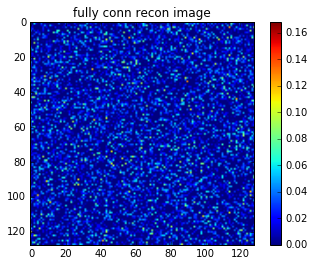

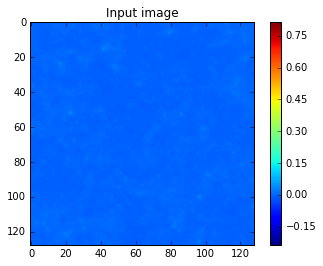

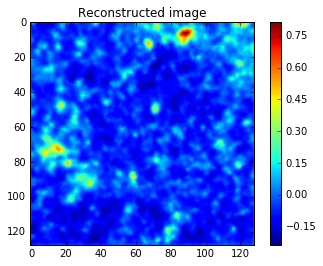

In [16]:
import h5py
import matplotlib
import matplotlib.pyplot as plt

lol ='/global/homes/s/ssingh79/convolutional_autoencoder-master/output_files/Conv_ae_output_tvt/reconstructed_maps.h5'
with h5py.File(lol,'r') as hf:
    pred_images = hf['recon_maps'][:]
    print(pred_images.shape)

lol2 = '/global/homes/s/ssingh79/convolutional_autoencoder-master/output_files/Conv_ae_output_tvt/normalized_maps.h5'
with h5py.File(lol2,'r') as hf:
    norm_images = hf['norm_maps'][:]
    print(norm_images.shape)
    
    
lol3 = '/global/homes/s/ssingh79/convolutional_autoencoder-master/output_files/Conv_ae_output_fully_conn/reconstructed_maps.h5'
with h5py.File(lol3,'r') as hf:
    rec_images = hf['recon_maps'][:]
    print(rec_images)
    print(rec_images.shape)

    

    

%matplotlib inline
#plt.subplot(1,2,1)
#plt.imshow(norm_images[9][0])
#plt.colorbar()
#plt.subplot(1,2,2)
#plt.imshow(pred_images[9][0])
#plt.colorbar()

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()
im = ax.imshow(rec_images[1,:].reshape(128,128))
ax.set_title('fully conn recon image')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
#cbar = fig.colorbar(cax, ticks=[-1, -0.5, 0, 0.5, 1])
#cbar.ax.set_yticklabels(['-1','-0.5', '0', '0.5', '1'])  # vertically oriented colorbar
fig.colorbar(im)


# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()
im = ax.imshow(norm_images[5][0], vmin=-0.235514511651, vmax=0.817006060046)
ax.set_title('Input image')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
#cbar = fig.colorbar(cax, ticks=[-1, -0.5, 0, 0.5, 1])
#cbar.ax.set_yticklabels(['-1','-0.5', '0', '0.5', '1'])  # vertically oriented colorbar
fig.colorbar(im)


print(pred_images[5][0].min())
print(pred_images[5][0].max())
fig, ax = plt.subplots()
cax = ax.imshow(pred_images[5][0], vmin=-0.235514511651, vmax=0.817006060046)
ax.set_title('Reconstructed image')
cbar = fig.colorbar(cax)





In [49]:
help(pcolor)

NameError: name 'pcolor' is not defined

In [10]:
import sys 
sys.path.insert(0,'/global/common/cori/software/tqdm/4.7.4/') 
print(sys.path) 
import tqdm 
from scipy.misc import imsave 
import PIL 
import pandas 

['/global/common/cori/software/tqdm/4.7.4/', '/global/common/cori/software/tqdm/4.7.4/', '/global/common/cori/software/tqdm/4.7.4/', '/global/common/cori/software/tqdm/4.7.4/', '/global/common/cori/software/tqdm/', '/global/common/cori/software/tqdm/4.7.4/tqdm/', '/global/common/cori/software/tqdm/4.7.4/tqdm/', '', '/usr/local/src/jupyterhub', '/anaconda3/lib/python35.zip', '/anaconda3/lib/python3.5', '/anaconda3/lib/python3.5/plat-linux', '/anaconda3/lib/python3.5/lib-dynload', '/anaconda3/lib/python3.5/site-packages', '/anaconda3/lib/python3.5/site-packages/Sphinx-1.4.1-py3.5.egg', '/anaconda3/lib/python3.5/site-packages/setuptools-23.0.0-py3.5.egg', '/anaconda3/lib/python3.5/site-packages/IPython/extensions', '/global/u1/s/ssingh79/.ipython']


In [ ]:
import numpy as np
import random
import h5py

imi = np.ceil(1000*random.uniform(0,1))
print(imi)
imsize = 1024
border = 4 
sz = 128
patch_dim = 128*128
# This fucker takes 128x128 images and gives you random patches of 32x32 !!!

print("Loading data ..............")
with h5py.File('/global/homes/s/ssingh79/data/conv_z02.h5','r') as hf:
    IMAGES = hf['X_train'][:,:]
    print(IMAGES.shape)

print("Let's do some transformation !!!")

IMAGES = IMAGES.transpose()
print(IMAGES.shape)
IMAGES = IMAGES.reshape(1024,1024,-1)
print(IMAGES.shape)

#images = np.random.random((128,128,1000))
#print(images.shape)

batch = 1000
data = np.zeros((patch_dim,batch))

for i in range(batch):
    print("Taking patch for batch -- iteration : ", i)
    r = border + np.ceil((imsize-sz-2*border) * random.uniform(0,1))
    c = border + np.ceil((imsize-sz-2*border) * random.uniform(0,1))
    #print(r,c)
    data[:,i] = np.reshape(IMAGES[r:r+sz, c:c+sz, imi-1],patch_dim,1)
    
print("The 1M dataset is : ", data)
print(data.shape)

with h5py.File('/global/homes/s/ssingh79/data/train_samples_1M.h5','w') as hf:
    print("Creating new dataset .............")
    hf.create_dataset('X_train',data=data)

    

In [ ]:
#!/bin/bash
lambda=(0.01 0.1 1. 10)
basis=(50 60 70 80 90 100)
for lam in lambda
   do
   for bas in basis
   do
   squeue < job parameters> wrapper_field_olsh.py --lambda $lam --basis $basis
   done
done

In [14]:
import numpy as np
import random
batch = 100000

idx = np.ceil(batch*random.uniform(0,1))
print(idx)

63172.0


<function matplotlib.pyplot.close>

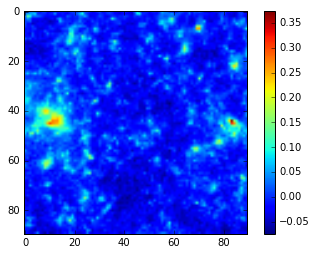

In [9]:
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt

with h5py.File('/global/homes/s/ssingh79/data/conv_z02.h5') as hf:
    image = hf['X_train'][0,:]

with h5py.File('/global/homes/s/ssingh79/data/train_data_64k.h5') as hf:
    image1 = hf['X_train'][120,:]

with h5py.File('/global/homes/s/ssingh79/data/train_samples_1M_p90.h5') as hf:
    image2 = hf['X_train'][90,:]

image = image.reshape(1024,1024)
image1 = image1.reshape(128,128)
image2 = image2.reshape(90,90)

%matplotlib inline
plt.imshow(image2)
plt.colorbar()
plt.savefig('90.png')
plt.close
